# Carolyn's scratch notebook to work through toilet data


In [1]:
#load libraries

import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

### Import Data from LA Parks and LA CAN

In [2]:
# upload park bathroom data
parks = pd.read_csv('MiscData/parkslatlon.csv')

#upload LACan bathroom, handwashing stations, etc data
lacan = pd.read_csv('LACAN Data/allstations_LACAN.csv')

In [3]:
# convert to geodataframes and project
parksGdf = gpd.GeoDataFrame(parks, geometry=gpd.points_from_xy(parks.lon, parks.lat, 
                                                               crs='EPSG:3857'))

lacanGdf = gpd.GeoDataFrame(lacan, geometry=gpd.points_from_xy(lacan.X, lacan.Y, 
                                                               crs='EPSG:3857'))

### Prepare data to concatonate
First, begin with parks data. Drop unnecessary columns and add a column to label it as 'LA Parks' so we know where that data come from.

In [4]:
#drop unnecessary columns
parksGdf = parksGdf.drop(columns=['Unnamed: 0', 'address', 'lat', 'lon'])


In [5]:
#add a column to specify type
parksGdf['type'] = 'LA Parks'

#rearrange columns if necessary - in this case, not necessary
#parksGdf = parksGdf[['name', 'geometry', 'type']]

In [6]:
parks.head()

,Unnamed: 0,name,address,lat,lon,geometry
0,0,Augustus F. Hawkins Natural Park,"57905790 Compton Ave., Los Angeles, CA 90011",34.013860,-118.247864,POINT (-118.248 34.014)
1,1,Bird Sanctuary,"2900 N. Vermont Ave., Los Angeles, CA 90027",34.105176,-118.291805,POINT (-118.292 34.105)
2,2,Bishop Canyon,"929 Academy Rd., Los Angeles, CA 90012",34.079904,-118.236590,POINT (-118.237 34.080)
3,3,Brand Park,"15174 San Fernando Mission Rd., Mission Hills,...",34.272294,-118.461158,POINT (-118.461 34.272)
4,4,Branford Recreation Center,"13306 Branford Street, Arleta, CA 91331",34.233507,-118.423193,POINT (-118.423 34.234)


In [7]:
#drop unnecessary columns from LACAN
lacanGdf = lacanGdf.drop(columns=['X', 'Y', 'description', 'gx_media_links'])

In [8]:
#rearrange columns
lacanGdf = lacanGdf[['name', 'geometry', 'type']]

### Concatenate

In [9]:
#concatenate the two gdfs
lacanparks = pd.concat([parksGdf, lacanGdf], axis=0)

In [10]:
lacanparks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 291 entries, 0 to 255
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      291 non-null    object  
 1   geometry  291 non-null    geometry
 2   type      291 non-null    object  
dtypes: geometry(1), object(2)
memory usage: 9.1+ KB


In [11]:
lacanparks = lacanparks.to_crs('EPSG:3857')

In [12]:

lacanparks.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

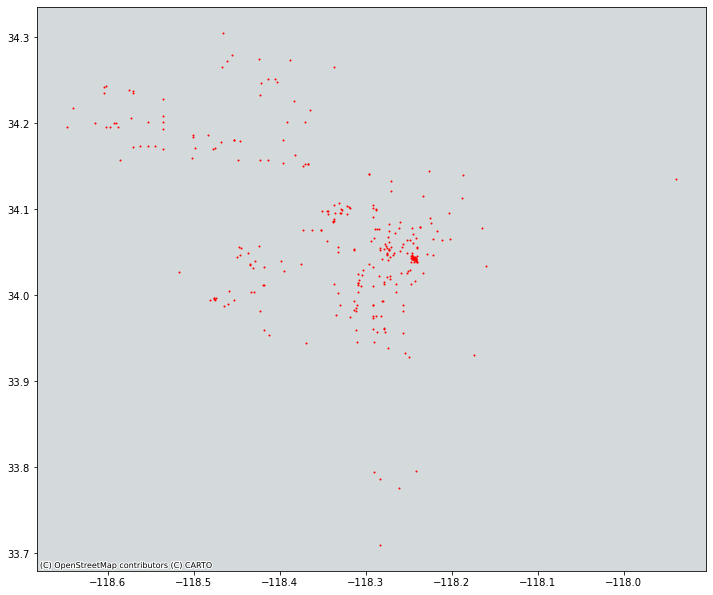

In [13]:
import contextily as ctx
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,12))

lacanparks.plot(ax=ax,
             color='red',
             markersize=1)

# no axis
#ax.axis('off')

# add a basemap
ctx.add_basemap (ax, zoom=5, source=ctx.providers.CartoDB.Positron)

### Save a geojson file of my gdf

In [14]:
import fiona
lacanparks.to_file("toilets.geojson", driver='GeoJSON')

/Users/kevin/opt/anaconda3/envs/uds/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


### Imported data from the "MyGeodataCloud" website

I imported and looked at this dataset that welisted in our original proposal. While there were many points, they were not well-defined. We didn't understand where this toilet data came from, who managed those restrooms, etc. Wee ultimately decided not to include it in our final dataset.

In [15]:
#geotoiletsGdf = gpd.read_file('MyGeodataCloud_data/toilets_point.geojson')

In [16]:
#geotoiletsGdf.info()

In [17]:
#geotoiletsGdf.head()

### Mapping the toilets
I tried mapping the data we do have. I think there's an issue with the projection...the contextily basemap isn't loading. >:(

/Users/kevin/opt/anaconda3/envs/uds/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


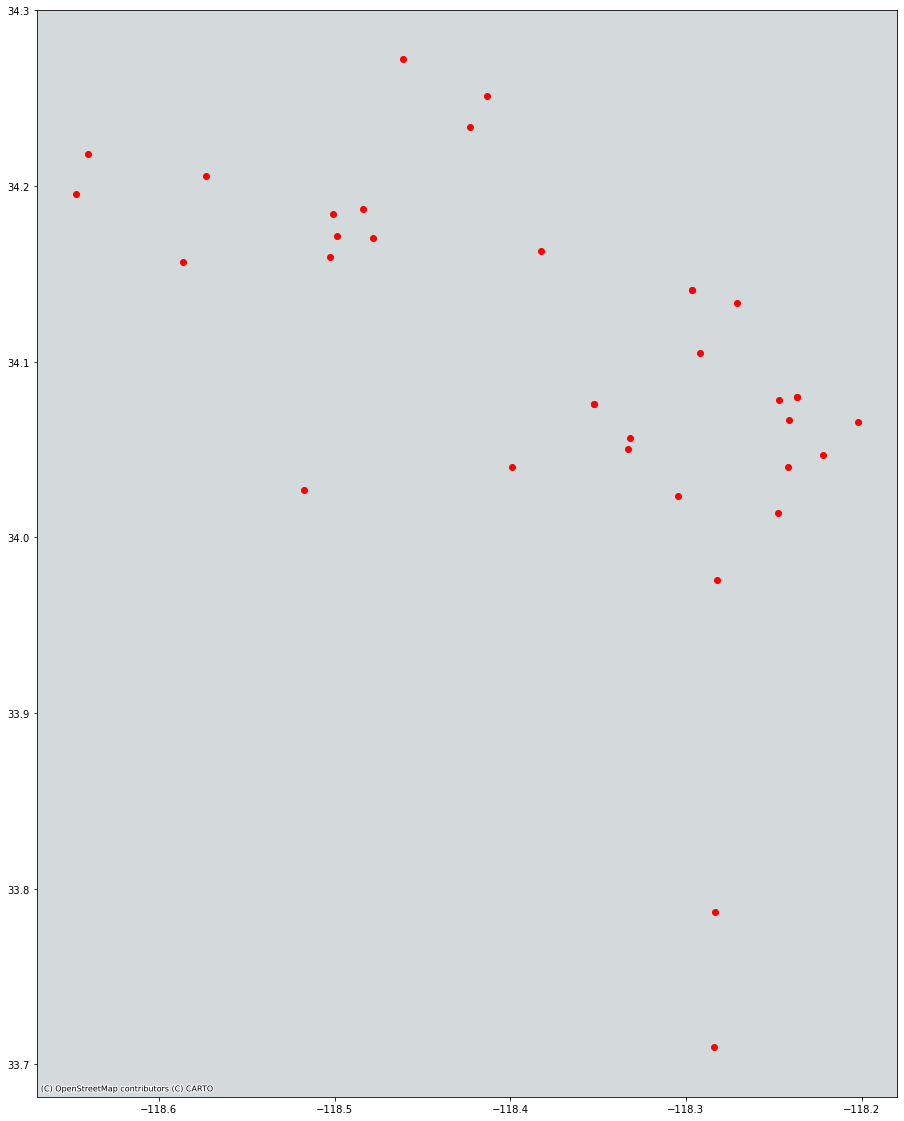

In [18]:
fig, ax = plt.subplots(figsize=(20,20))

# add the layer with ax=ax in the argument 
parksGdf.plot(ax=ax,
               color='r'
              )

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

# A wasteland of code
I initially tried scraping the LA Parks website to no avail. Ultimately I went with a much simpler path with retrieving park bathrooms data....

## Section 1. Attempts to scrape restroom data from LA Parks

I'm mostly trying to follow the lecture notebook for '7 Scraping Craigslist'

In [19]:
# using the laparks.org page for Gladys Park which I confirmed has restrooms
import requests
from bs4 import BeautifulSoup

url = 'https://www.laparks.org/park/6th-gladys-street'
r = requests.get(url)

soup = BeautifulSoup(r.content)
print(soup.prettify())


<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="og: http://ogp.me/ns# content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
 <head>
  <link href="http://www.w3.org/1999/xhtml/vocab" rel="profile"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <script async="async" defer="defer" src="https://www.google.com/recaptcha/api.js?hl=en">
  </script>
  <link href="https://www.laparks.org/sites/all/themes/bootstrap/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
  <title>
   Gladys Park | City of Los Angeles Department of Recreation and Parks
  </title>
  <meta content="Gladys Park | City of Los Angeles Department of Recreatio

In [20]:
restrooms = soup.find_all(class_ = 'field field-name-field-public-info field-type-text-long field-label-above')
print(len(restrooms))

1


In [21]:
restrooms[0]

<div class="field field-name-field-public-info field-type-text-long field-label-above">
<div class="field-label">Facility Features </div>
<div class="field-items">
<div class="field-item even">
<p>Restrooms, Basketball Court, Exercise Equipment, Picnic Tables, Charging Station, Stage, Water Fountains					</p>
</div>
</div>
</div>

In [22]:
print(restrooms[0].find('div', class_= 'field-item even').text)


Restrooms, Basketball Court, Exercise Equipment, Picnic Tables, Charging Station, Stage, Water Fountains					



In [23]:
hours = soup.find_all(class_ = 'field field-name-field-hours-of-operation field-type-text-long field-label-above')
print(len(hours))

1


In [24]:
print(hours[0].find('div', class_= 'field-item even').text)

Sunday—Saturday 8:00 AM—8:00 PM 
Newly renovated park with permanent restrooms, exercise equipment, basketball court, picnic tables, and a charging station. 
Please email SkidRow.Parks@lacity.org for permits. 
 



In [25]:
# skipped a step in the lecture notebook about getting the URL
#will have to come back to it

In [26]:
import pandas as pd
restroomList = [] # empty list that we can append to

for restroom in restrooms:

SyntaxError: unexpected EOF while parsing (2409212938.py, line 4)

## Section 1.2 More Park stuff

In [ ]:
park_url = 'https://www.laparks.org/park/encino'
r = requests.get(park_url)
soup = BeautifulSoup(r.content)
print(soup.prettify())

In [ ]:
restrooms = soup.find_all(class_= 'field-label')
print (len(restrooms))

In [ ]:
restrooms [0]

In [ ]:
restrooms [1]

In [ ]:
restrooms[2]

In [ ]:
restrooms [3]

In [ ]:
restrooms [4]

In [ ]:
restrooms[5]

In [ ]:
restrooms[6]

In [ ]:
restrooms [7]

In [ ]:
restrooms[8]

In [ ]:
print(restrooms[6].find('div', class_= 'field-label').text)

In [ ]:
libraries = 'https://lapl.org/branches'
rlibraries = requests.get(libraries)
soup = BeautifulSoup(rlibraries.content)
print(soup.prettify())

## Section 3. County Library Data API
This code works, but not ultimately needed for this notebook.

In [ ]:
#First I will create a pandas dataframe (countylib) of all LA County Library locations, including their name, hours, and the other information that is returned from the branch information API.

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.lacity.org", None)

results = client.get("a4nt-4gca", limit=2000)

countylib = pd.DataFrame.from_records(results)

In [ ]:
countylib.info()

In [ ]:
#geojson
import json
import requests
import pandas as pd

r = requests.get('https://data.lacounty.gov/resource/nrtn-ga3s.geojson')
library = r.json()
df = pd.DataFrame(censusdata[1:], columns=censusdata[0])
df.head()
https://data.lacounty.gov/resource/nrtn-ga3s.geojson

In [ ]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.lacounty.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.lacounty.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("nrtn-ga3s", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [ ]:
results_df.info()

In [ ]:
results_df.head()